# Unsupervised Learning
#### © Explore Data Science Academy

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes.

### Honour Code
We JS7, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the EDSA honour code (https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

Import Libraries and Read In the Data
Do not modify or remove any of the code in these cells.

## Problem Statement

Everyone loves movies irrespective of age,gender,race,color,or geographical location. We all in a way are connected to each other via this amazing meduim. Media has value and with Value come responsibility. One such responsibity is that of guiding people towards selections they will love. Using someones past experience we can finetune a selection of media catored to their tatse. As we all know a happy customer is a loyal customer! ...............................

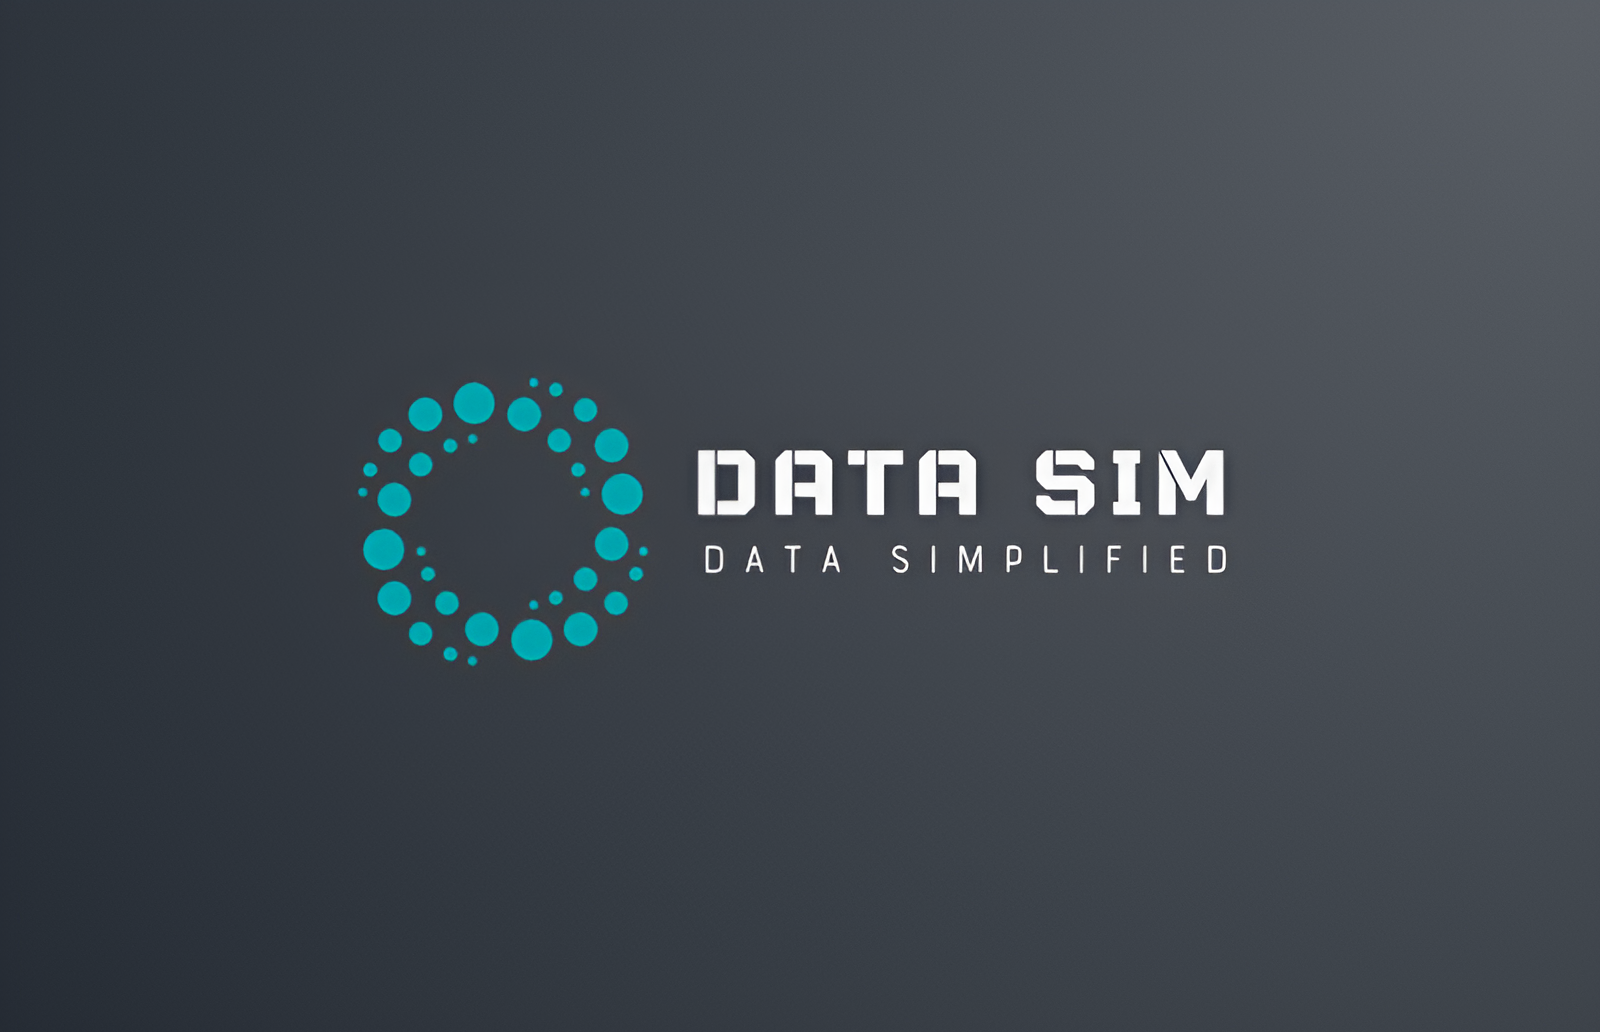

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Recommender System</a>

<a href=#eight>7. Conclusion</a>

<a href=#eight>8. References</a>

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

* The goal of the imported packages is that of having the necessary to visualise and analyse the problem at hand...........

In [2]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=9fe629e4aa9ce839d0f816f348869f3ea3abfc4963aa5b344f544817effb22de
  Stored in directory: c:\users\f5469007\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [45]:
#Data analysis import
import numpy as np 
import pandas as pd 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Visualizations libraries...
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Natural Language Processing libraries....
from wordcloud import STOPWORDS, WordCloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

#scikit-surprise packages
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import KNNBaseline
from surprise import accuracy


# nltk for preprocessing of text data
from nltk.corpus import stopwords

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

###### <a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* The below data will be looked at in unique and exciting ways to show how one can gain insight on the data.

In [46]:
# import dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_movies = pd.read_csv('movies.csv')
df_tags = pd.read_csv('tags.csv')
df_links = pd.read_csv('links.csv')
df_imdb = pd.read_csv('imdb_data.csv')
genome_tags = pd.read_csv('genome_tags.csv')
genome_score = pd.read_csv('genome_scores.csv')
sample_submission = pd.read_csv('sample_submission.csv')
df_ratings = pd.read_csv('ratings.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* This section of the journey will look at diving deeper into the data in order to understand and gain insight on the data that will be used to create and generate a movie recomender.
* This will aid in understanding patterns in the data, pinpoint any outliers, and identifying relationships between variables.

* **Below we see there are three columns that one can work on this being the timestamp etc.**

In [47]:
df_train.head() # viewing the first n rows

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [67]:
df_train.shape #There are over ten million rows and four columns

(10000038, 4)

* **Below is a statistical analysis in which were look at how spread out the data is and how the data varies per row.**

In [49]:
df_train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


* **In our dataset, there may be some missing values. We cannot train our model with a dataset that contains missing values. So we have to check if our dataset has missing values.**


In [51]:
df_train.isnull().sum() # Here we see that there are no empty data points which is good!

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

* **We now have the data that we will later use to see how well our models we will build fair against unkown information.**

In [52]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


* **Here we see we have title and type of movie each movie posseses** 

In [53]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Joining Datasets

In [54]:
# Merging the dataset with that of the movies
df_train2 = pd.merge(df_train,df_movies,on='movieId')

# Viewing first 5 rows
df_train2.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [55]:
# Merging the dataset with that of the imbd
df_train3 = pd.merge(df_train2,df_imdb, on="movieId")

# Viewing first 5 rows
df_train3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


* **Below we look at the title and rating of movies**

In [56]:
df_train3.groupby('title')['rating'].mean().sort_values(ascending=False).head(5)

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
Name: rating, dtype: float64

* **Next we look at how many time each movie was rated from highest to lowest**

In [57]:
df_train3.groupby('title')['rating'].count().sort_values(ascending=False).head(5)

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

* **We then put them in tables to make it more easier to read!**

In [58]:
ratings=pd.DataFrame(df_train3.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",2.753731
$ (Dollars) (1971),2.875000
$5 a Day (2008),3.125000
$9.99 (2008),3.222222
$ellebrity (Sellebrity) (2012),2.250000


In [16]:
# Checking the number of ratings per title
ratings['number of ratings'] = pd.DataFrame(df_train3.groupby('title')['rating'].count())
ratings.head()

,rating,number of ratings
title,,
"""Great Performances"" Cats (1998)",2.753731,67
$ (Dollars) (1971),2.875000,16
$5 a Day (2008),3.125000,20
$9.99 (2008),3.222222,27
$ellebrity (Sellebrity) (2012),2.250000,2


In [17]:
# Top five of movies rated the most
ratings.sort_values('number of ratings', ascending=False).head()

,rating,number of ratings
title,,
"Shawshank Redemption, The (1994)",4.417624,32831
Forrest Gump (1994),4.047216,32383
Pulp Fiction (1994),4.195097,31697
"Silence of the Lambs, The (1991)",4.144172,29444
"Matrix, The (1999)",4.154253,29014


In [18]:
# Ratings on movies first five 
movie_ratings = pd.read_csv('train.csv')
movie_ratings.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


* **The goal is to look for duplicated rows of infomation or as we like to call them repeated offenders!**

In [19]:
# check duplicates
dup_bool = df_test.duplicated(['userId', 'movieId'])

# display duplicates
print("Number of duplicate records:", sum(dup_bool))

Number of duplicate records: 0


* **Creating copies in order to safeguard the originals!**

In [59]:
# Create a copy
train_f = df_train.copy()

In [60]:
df_test = df_test.copy()

### **<font color='green'>Scalling</font>**

* The goal of scaling is to reduce different forms of measurements to the same playing field. Instead of trying comparing kilometers with millimeters we recude all  to millimeters and compare.

### **<font color='green'>Unscaled data</font>**

* **What we will notice in the following visualisations is that the data is not spread out unevenly, because each column in our dataset is using difference forms of measuremnts**

In [61]:
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

In [62]:
# using plotly to plot the boxplot
train_f[:1000].iplot(kind='box', title="Boxplots of Features (Unscaled)")
cf.set_config_file(offline=True, world_readable=True, theme='ggplot')

In [63]:
# using plotly to plot the boxplot
df_test[:1000].iplot(kind='box', title="Boxplots of Features (Unscaled)")

### **<font color='green'>Scaled</font>**

* **Here we see boxplots that are more easy on the eye and show to be easier to compare in their outlier and sckewneess towards a particular extreme!**

In [64]:
# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
train_scaled = preprocessing.scale(train_f)
train_scaled = pd.DataFrame(train_scaled)

# plot boxplots using scaled data
train_scaled[:1000].iplot(kind='box', title="Boxplots of Features (Scaled)")

In [65]:
# create scaler object
scaler = StandardScaler()

# define scaled data frame variable
test_scaled = preprocessing.scale(df_test)
test_scaled = pd.DataFrame(test_scaled)

# plot boxplots using scaled data
test_scaled[:1000].iplot(kind='box', title="Boxplots of Features (Scaled)")

### **<font color='green'>KMeans Clustering Visualisation</font>**

In [68]:
# Import package for clusters
from scipy.spatial.distance import cdist

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'Distortion')

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

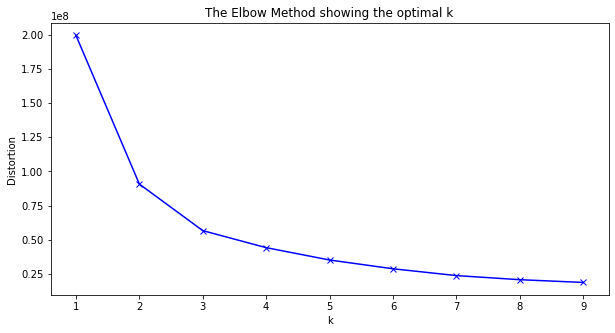

In [30]:
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_train)
    kmeanModel.fit(df_train)
    distortions.append(sum(np.min(cdist(df_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_train.shape[0])
 
# Plot the elbow
plt.figure(figsize = (10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* The following bar graph looks at the distribution of movies and how many fall in each rating. Here we see that the level 4 rating is the most common rating.

Average rating in dataset: 3.5333951730983424


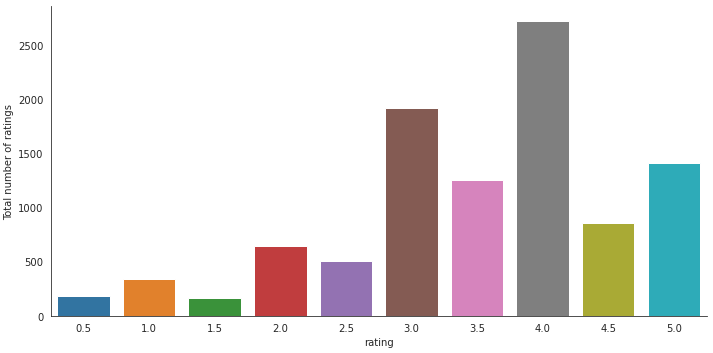

In [27]:
# Distributions of ratings
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=movie_ratings[:10000], aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(movie_ratings["rating"])}')

**Observations:**

* We can observe that a high percentage of our movies were rated above average i.e above 3000
* A low percentage were below 3000

**Recommendation:**
    
* Hence More movies are high quality perhaps people are watching movies that are recommended to them, either by their social groups or the recommender system itself.

In [31]:
labels = ['timestamp']
features = [col for col in df_train.columns if col not in labels]

In [32]:
#Splitting data to train models
X = df_train[features][:20000].drop(columns=['rating'])
y = df_train['rating'][:20000]

In [33]:
# define scaled data frame variable
# create scaler object
scaler = StandardScaler()
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

### **<font color='green'>Dendrogram</font>**

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [70.0, 70.0, 93.75, 93.75],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [215.0, 215.0, 240.0, 240.0],
  [183.75, 183.75, 227.5, 227.5],
  [141.25, 141.25, 205.625, 205.625],
  [81.875, 81.875, 173.4375, 173.4375],
  [25.0, 25.0, 127.65625, 127.65625],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [282.5, 282.5, 313.75, 313.75],
  [265

Text(0.5, 0, 'data points')

Text(0, 0.5, 'eucliden distance')

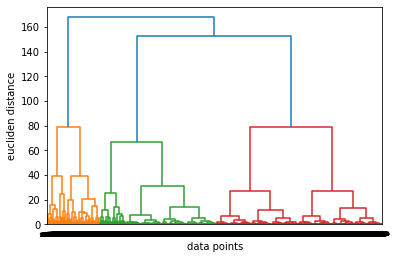

In [34]:

from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(X_scaled,method="ward")
dendrogram(merg,leaf_rotation = 5)
plt.xlabel("data points")
plt.ylabel("eucliden distance")
plt.show()

### **<font color='green'>Merging more datasets</font>**

In [18]:
# Merge the ratings and movies
df_merge1 = train_f.merge(df_movies, on='movieId')
# View the first 5 rows
df_merge1.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [25]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
    background_color='black',
    width = 1000,
    height = 400).generate(str(text))
    fig = plt.figure(
    figsize = (10, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

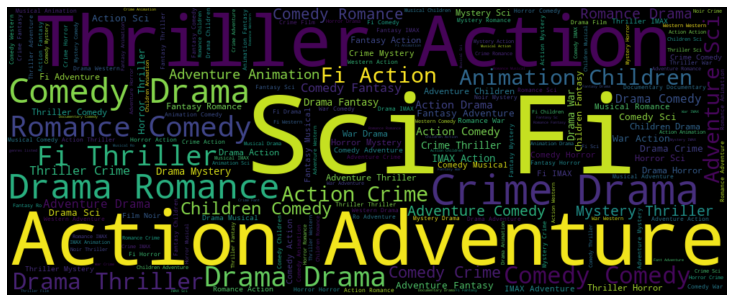

In [26]:
# Word cloud
train_word = df_merge1.genres
generate_word_cloud(train_word)

**The top 5 genres are, in the respect order;**
* Thriller
* Action
* Sci Fi
* Adventure
* Drama
   

In [28]:
# Merge the ratings and movies
df_merge1_test = df_test.merge(df_movies, on='movieId')
# View the first 5 rows
df_merge1_test.head()

,userId,movieId,title,genres
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
1,13,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
2,54,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
3,57,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi
4,120,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi


In [29]:
df_merge2 = df_merge1.merge(df_imdb, on="movieId")
# View first 5 rows
df_merge2.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [30]:
df_merge2_test = df_merge1_test.merge(df_imdb, on="movieId")
# View first 5 rows
df_merge2_test.head()

,userId,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
1,13,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
2,54,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
3,57,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN
4,120,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN


In [31]:
# Merging the merge data earlier on with the df_imbd
df_merge3 = df_merge2.merge(df_imdb, on="movieId" )
# View first 5 rows
df_merge3.head()

,userId,movieId,rating,timestamp,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [32]:
# Merging the merge data earlier on with the df_imbd
df_merge3_test = df_merge2_test.merge(df_imdb, on="movieId" )
# View first 5 rows
df_merge3_test.head()

,userId,movieId,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,57,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
major= df_merge3.drop_duplicates('movieId')
major.head(2)

,userId,movieId,rating,timestamp,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4253,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [34]:
major_test = df_merge3_test.drop_duplicates('movieId')
major_test.head(2)

,userId,movieId,title,genres,title_cast_x,director_x,runtime_x,budget_x,plot_keywords_x,title_cast_y,director_y,runtime_y,budget_y,plot_keywords_y
0,1,2011,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4658,1,4144,In the Mood For Love (Fa yeung nin wa) (2000),Drama|Romance,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...,Kar-Wai Wong,98.0,NaN,adultery|loneliness|neighbor|infidelity,Maggie Cheung|Tony Chiu-Wai Leung|Ping Lam Siu...,Kar-Wai Wong,98.0,NaN,adultery|loneliness|neighbor|infidelity


### **<font color='green'>Principal Component Analysis</font>**

* PCA looks at creating existing clusters in the data, the goal is to look at data without an agenda and allow itself to be grouped baced on how close points are in relation to one another. The closer you are the stronger the conection, the more you are part of that group!

In [35]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(train_f)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)


* Another trick that PCA has it is it helps one learn how much of your data you actually need to predict for the future! Why use it all when you can affectively use less and get as good of results!!!

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

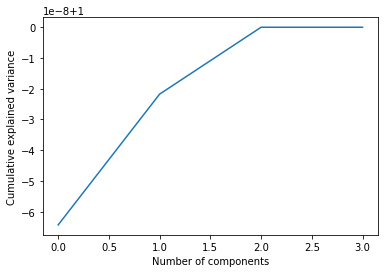

In [36]:
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

* What we learn is that 2  of the columns and data in the dataset explain for the majority of the data trends and behaviour. This makes sence as there are not as many columns.

In [37]:
# define PCA object
pca = PCA()

# fit the PCA model to our data and apply the dimensionality reduction 
prin_comp = pca.fit_transform(test_scaled)

# create a dataframe containing the principal components
pca_df = pd.DataFrame(data = prin_comp)

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explained variance')

array([[ 1.61090984,  0.76455666, -1.4866371 ],
       [-0.41761693, -1.04002594, -0.22950136],
       [-0.73016497, -1.95976845,  0.09282209],
       ...,
       [ 0.66467961, -1.37812249,  0.87320328],
       [ 0.44359078, -0.41799996, -0.24010424],
       [-1.48794115, -1.14462727,  0.61923322]])

88.0 % of variance explained by 3 components.


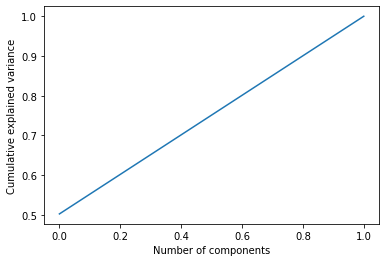

In [38]:
# plot line graph of cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
pca_85 = PCA(.85)
pca_85.fit_transform(train_scaled)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

* For the test data, there is only two columns and as a result all of the data is needed to explain for the whole dataset.

In [39]:
pca.explained_variance_ratio_[:3]
pca_85 = PCA(.85)
pca_85.fit_transform(test_scaled)
print(round(pca_85.explained_variance_ratio_.sum()*100, 1),
      "% of variance explained by",
      pca_85.n_components_,
      "components.")

array([0.50220069, 0.49779931])

array([[ 0.87794787, -1.57639237],
       [ 0.91643968, -1.53790056],
       [ 0.9457281 , -1.50861214],
       ...,
       [-1.52446222,  0.933174  ],
       [-1.5116677 ,  0.94596852],
       [-1.48524857,  0.97238765]])

100.0 % of variance explained by 2 components.


* **Now that we know that we can essentially drop one column the we decided to drop the timesamp. This is because how long a movie is does not nessacerally acount for a movies quality.**

In [40]:
labels = ['timestamp']
features = [col for col in df_train.columns if col not in labels]

###### <a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* **Now it is time to transform the data so that we can train a Machine Learning Model. The goal is to have it it in a standard and form that can be fed into the various data models.**

In [41]:
# Data Engineering, Splitting the data to X and y to train the data
X = df_train[features].drop(columns=['rating'])
y = df_train['rating']

* **Like before we now scale the data for models to traing at the same measuring frequency!**

In [42]:
# define scaled data frame variable
# create scaler object
scaler = StandardScaler()
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

* **We also transform the data into clusters to improve model ability.**

In [43]:
df_train3.tail(5)

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
9633026,129077,66579,3.0,1446895942,"Lost, The (2009)",Thriller,Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...,Dan Dworkin,95.0,NaN,NaN
9633027,78784,96316,3.5,1345995049,Aliisa (1970),Drama,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,NaN,NaN,janitor|income|housing problem|social problem
9633028,80974,82732,3.0,1293164312,New York Confidential (1955),Crime|Drama|Film-Noir,NaN,NaN,NaN,NaN,NaN
9633029,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War,Christopher R Swanson|Daniel Asher|Brian Banca...,Nick Day,112.0,"$600,000",soldier|italy|partisan|fascist
9633030,72315,97148,3.0,1567584197,Elia Kazan: A Director's Journey (1995),Documentary,Elia Kazan|Eli Wallach,Richard Schickel,75.0,NaN,genius|artist|greek american|direction


In [44]:
df_train3=df_train3.fillna(0)#converts NA to 0

In [45]:
df_train3.tail() # NA filled with 0

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
9633026,129077,66579,3.0,1446895942,"Lost, The (2009)",Thriller,Armand Assante|Dina Meyer|Lacey Chabert|Sergi ...,Dan Dworkin,95.0,0,0
9633027,78784,96316,3.5,1345995049,Aliisa (1970),Drama,Siiri Angerkoski|Selma Miettinen|Varma Lahtine...,Aulikki Oksanen,0.0,0,janitor|income|housing problem|social problem
9633028,80974,82732,3.0,1293164312,New York Confidential (1955),Crime|Drama|Film-Noir,0,0,0.0,0,0
9633029,84146,107912,3.0,1389449965,"Fallen, The (2004)",Action|Drama|War,Christopher R Swanson|Daniel Asher|Brian Banca...,Nick Day,112.0,"$600,000",soldier|italy|partisan|fascist
9633030,72315,97148,3.0,1567584197,Elia Kazan: A Director's Journey (1995),Documentary,Elia Kazan|Eli Wallach,Richard Schickel,75.0,0,genius|artist|greek american|direction


### Cosine similarity

* Cosine similarity is a technique for measuring the similarity between vectors. It calculates the cosine of the angle between the two vectors. If the angle between the two vectors is zero, the similarity is calculated as 1 because the cosine of zero is 1. So the two vectors are the same. The cosine of any angle varies from 0 to 1. Therefore, similarity rates will vary from 0 to 1. The formula is expressed as follows:





$$ \begin{align}
Sim(A,B)  & = \frac{(A_{r1} \times B_{r1})+(A_{r2} \times B_{r2})}{\sqrt{A_{r1}^2 + A_{r2}^2} \times \sqrt{B_{r1}^2 + B_{r2}^2}} \\ \\
& = \frac{(3 \times 5) + (4 \times 2)}{\sqrt{9 + 16} \times \sqrt{25 + 4}} \\ \\
& = \frac{23}{26.93} \\ \\
& = 0.854
\end{align} $$

**Advantages**
* The user gets recommended the types of items they love.
* The user is satisfied by the type of recommendation.
* New items can be recommended; just data for that item is required.

**Disadvantages**
* The user will never be recommended for different items.
* Business cannot be expanded as the user does not try a different type of product.
* If the user matrix or item matrix is changed the cosine similarity matrix needs to be calculated again.
* Limited content analysis: If the content doesn’t contain enough information to discriminate the items precisely, the recommendation itself risks being imprecise.
* Over-specialization: Content-based filtering provides a limited degree of novelty since it has to match up the features of a user’s profile with available items. In the case of item-based filtering, only item profiles are created and users are suggested items similar to what they rate or search for, instead of their history. A perfect content-based filtering system may suggest nothing unexpected or surprising.


<a id="thirteen"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

### **<font color='darkcyan'>Linear Regression</font>**

* **A linear Regression is a model that draws a straight line through data in a grap in order to provide a road map of how data changes over time or in relation to one another!**

In [46]:
lr = LinearRegression()
# train the model on training data
lr.fit(X_train, y_train)
# use the forest's predict method on the test data
predictions = lr.predict(X_test)

# calculate the absolute errors
errors = abs(predictions - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

LinearRegression()

Mean Absolute Error: 0.84


### **<font color='darkcyan'>Decision Tree Regression</font>**

* **Are another model, that uses a complex of splits of data and decisions with the goal of finding a root pattern!**

In [47]:
# instantiate model with 1000 decision trees
dt = DecisionTreeRegressor(max_depth = 100)

In [48]:
# train the model on training data
dt.fit(X_train, y_train)
# use the forest's predict method on the test data
pred_dt = dt.predict(X_test)

# calculate the absolute errors
errors = abs(pred_dt - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


DecisionTreeRegressor(max_depth=100)

Mean Absolute Error: 1.03


### **<font color='darkcyan'>KMeans Clustering</font>**

* **This is the first clustering and unsupervised style of modeling used in this project. This looks at mean points in clusters and draws meaning form these points.**

In [49]:
km = KMeans(n_clusters = 3, random_state=42)
km.fit(X_train, y_train)

# obtain cluster memberships for each item in the data
y_preds_Kmeans = km.predict(X_test)

# calculate the absolute errors
errors = abs(y_preds_Kmeans - y_test)
# print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

KMeans(n_clusters=3, random_state=42)

Mean Absolute Error: 2.59


* Linear regression under the MDS is still the best performing with Mean Absolute Error of 0.84

### **<font color='darkcyan'>Singular Value Decomposition (SVD)</font>**

* **The Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science.**

In [41]:
train = df_train.copy()
reader = Reader()
# Data selected for model training
train = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

In [42]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(train, test_size=0.02)

In [43]:
svd = SVD()

In [44]:
svd.fit(trainset)

In [45]:
predictions = svd.test(testset) 

In [46]:
accuracy.rmse(predictions)

RMSE: 0.8192


0.8192244936008168

In [47]:
df_pred = pd.DataFrame(predictions)
df_pred.head()

,uid,iid,r_ui,est,details
0,91750,597,4.5,4.167298,{'was_impossible': False}
1,13535,148486,1.0,1.942143,{'was_impossible': False}
2,129133,147330,4.5,4.514015,{'was_impossible': False}
3,86930,98809,3.0,4.018814,{'was_impossible': False}
4,23478,46335,4.5,3.206252,{'was_impossible': False}


In [14]:
predictions=[svd.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
predictions

[Prediction(uid=1, iid=2011, r_ui=None, est=3.1519336706674674, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.359058912948057, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.690679198057042, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=3.9184940338544907, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=2.6224976978109633, details={'was_impossible': False}),
 Prediction(uid=1, iid=8405, r_ui=None, est=3.75621907461209, details={'was_impossible': False}),
 Prediction(uid=1, iid=8786, r_ui=None, est=4.118061313181054, details={'was_impossible': False}),
 Prediction(uid=2, iid=150, r_ui=None, est=3.390619821387862, details={'was_impossible': False}),
 Prediction(uid=2, iid=356, r_ui=None, est=3.7278181943337017, details={'was_impossible': False}),
 Prediction(uid=2, iid=497, r_ui=None, est=3.327988852421787, details={'was_impossible': False}),
 Predictio

In [16]:
pred_svd = pd.DataFrame(predictions)
pred_svd

### **<font color='darkcyan'>K-Nearest Neighbors(KNN)</font>**

* **For example, suppose a k-NN algorithm was given an input of data points of specific men and women's weight and height, as plotted below. To determine the gender of an unknown input (green point), k-NN can look at the nearest k neighbours (suppose k=3k=3) and will determine that the input's gender is male. This method is a very simple and logical way of marking unknown inputs, with a high rate of success.**

In [23]:
train = df_train.copy()
reader = Reader()
# Data selected for model training
train = Dataset.load_from_df(train[['userId', 'movieId', 'rating']][:12000], reader)

In [24]:
from surprise.model_selection import train_test_split
trainset_small, testset_small = train_test_split(train, test_size=0.02)

In [25]:
knn = KNNBaseline()

In [26]:
knn.fit(trainset_small)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [34]:
pred_knnbase = knn.test(testset_small) 

In [33]:
accuracy.rmse(pred_knnbase)

RMSE: 1.0230


1.0230058590639504

<a id="thirteen"></a>
## **<font color='Red'>6. Recommender System</font>**
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### **<font color='darkcyan'>Content Based Recommender 🎥</font>**


* **A Content-Based Recommender works by the data that we take from the user, either explicitly (rating) or implicitly. By the data we create a user profile, which is then used to suggest to the user, as the user provides more input or take more actions on the recommendation, the engine becomes more accurate.**

In [29]:
# Viewing the first 5 rows
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [30]:
df_movies['keyWords'] = df_movies['genres'].str.replace('|', ' ')

# Convienient indexes to map between book titles and indexes of 
# the df_movies dataframe
titles = df_movies['title']
indices = pd.Series(df_movies.index, index=df_movies['title'])

In [31]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(df_movies['keyWords'])

In [32]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix[:12112], 
                                        tf_authTags_matrix[:12112])

In [33]:
def content_generate_top_N_recommendations(Movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[Movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_authTags[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    book_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[book_indices]

In [34]:
content_generate_top_N_recommendations("In Bruges (2008)", N=10)

600                                           Fargo (1996)
1011                                        Freeway (1996)
3173     Man Bites Dog (C'est arrivé près de chez vous)...
4138                            Beautiful Creatures (2000)
5891                Confessions of a Dangerous Mind (2002)
6363                                 Hard Word, The (2002)
6582                                  Party Monster (2003)
9115         Freeway II: Confessions of a Trickbaby (1999)
10561                                    Cul-de-sac (1966)
Name: title, dtype: object

### **<font color='darkcyan'>Collaborative Based Recommender 🎞️</font>**


* **In Collaborative Filtering, we tend to find similar users and recommend what similar users like. In this type of recommendation system, we don’t use the features of the item to recommend it, rather we classify the users into the clusters of similar types, and recommend each user according to the preference of its clusterlink.**

In [5]:
# load the movie data
df_movies=pd.read_csv('movies.csv') 

In [28]:
# load the movie ratings
df_ratings = pd.read_csv( 'ratings.csv', low_memory=False)


In [29]:
print(df_ratings.shape)
print(df_ratings.columns)
df_ratings.head(3)


(100004, 4)
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


<AxesSubplot:ylabel='rating'>

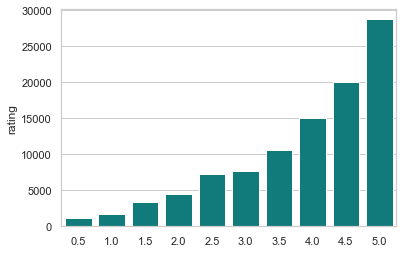

In [30]:
rankings_count = df_ratings.rating.value_counts().sort_values()
sns.barplot(x=rankings_count.index.sort_values(), y=rankings_count, color="darkcyan")
sns.set_theme(style="whitegrid")


In [31]:
# drop na values
df_ratings_temp = df_ratings.dropna()

In [32]:
# convert datetime
df_ratings_temp['timestamp'] = pd. to_datetime(df_ratings_temp['timestamp'], unit='s')

In [33]:
print(f'unique users: {len(df_ratings_temp.userId.unique())}, ratings: {len(df_ratings_temp)}')
df_ratings_temp.head()
# The Reader class is used to parse a file containing ratings.
# The file is assumed to specify only one rating per line, such as in the df_ratings_temp file above.
reader = Reader()
ratings_by_users = Dataset.load_from_df(df_ratings_temp[['userId', 'movieId', 'rating']], reader)

unique users: 671, ratings: 100004


,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-14 02:52:24
1,1,1029,3.0,2009-12-14 02:52:59
2,1,1061,3.0,2009-12-14 02:53:02
3,1,1129,2.0,2009-12-14 02:53:05
4,1,1172,4.0,2009-12-14 02:53:25


In [34]:
# Split the Data into train and test
# train an SVD model
from surprise.model_selection import train_test_split
train_df, test_df = train_test_split(ratings_by_users, test_size=.2)
svd_model = SVD()
svd_model_trained = svd_model.fit(train_df)


In [35]:
# 10-fold cross validation
cross_val_results = cross_validate(svd_model_trained, ratings_by_users, measures=['RMSE', 'MAE', 'MSE'], cv=10, verbose=False)
test_mae = cross_val_results['test_mae']


In [43]:
# mean squared errors per fold
df_test_mae = pd.DataFrame(test_mae, columns=['Mean Absolute Error'])
df_test_mae.index = np.arange(1, len(df_test_mae) + 1)
df_test_mae.sort_values(by='Mean Absolute Error', ascending=False).head(15)
print('MAE', np.mean(test_mae))

,Mean Absolute Error
6,0.698050
2,0.695641
7,0.689725
3,0.688532
1,0.686811
9,0.683751
8,0.683536
10,0.682614
5,0.676990
4,0.674041


MAE 0.6859689955391627


<Figure size 432x288 with 0 Axes>

<AxesSubplot:ylabel='Mean Absolute Error'>

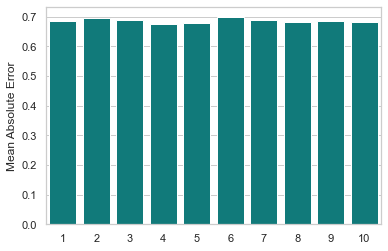

In [37]:
# plot an overview of the performance per fold
plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
sns.barplot(y='Mean Absolute Error', x=df_test_mae.index, data=df_test_mae, color="darkcyan")
# plt.title('Mean Absolute Error')
# predict ratings for a single user_id and for all movies
user_id = 400 # some test user from the ratings file

In [38]:
# create the predictions
pred_series= []
df_ratings_filtered = df_ratings[df_ratings['userId'] == user_id]

In [39]:
print(f'number of ratings: {df_ratings_filtered.shape[0]}')
for movie_id, name in zip(df_movies.index, df_movies['title']):
    # check if the user has already rated a specific movie from the list
    rating_real = df_ratings.query(f'movieId == {movie_id}')['rating'].values[0] if movie_id in df_ratings_filtered['movieId'].values else 0
    # generate the prediction
    rating_pred = svd_model_trained.predict(user_id, movie_id, rating_real, verbose=False)
    # add the prediction to the list of predictions
    pred_series.append([movie_id, name, rating_pred.est, rating_real])

number of ratings: 58


In [40]:
# print the results
df_recommendations = pd.DataFrame(pred_series, columns=['movieId', 'title', 'predicted_rating', 'actual_rating'])
df_recommendations.sort_values(by='predicted_rating', ascending=False).head(15)
# predict ratings for the combination of user_id and movie_id
user_id = 217 # some test user from the ratings file
movie_id = 4002
rating_real = df_ratings.query(f'movieId == {movie_id} & userId == {user_id}')['rating'].values[0]
movie_title = df_movies[df_movies.index == 862]['title'].values[0]

,movieId,title,predicted_rating,actual_rating
318,318,Swimming with Sharks (1995),4.713569,5.0
912,912,To Catch a Thief (1955),4.596540,0.0
1217,1217,"Bridge on the River Kwai, The (1957)",4.558190,0.0
926,926,My Man Godfrey (1936),4.542733,0.0
1204,1204,Trust (1990),4.510279,0.0
50,50,Guardian Angel (1994),4.486302,4.0
2019,2019,"Jerk, The (1979)",4.482475,0.0
922,922,"Ghost and Mrs. Muir, The (1947)",4.463831,0.0
3462,3462,Stacy's Knights (1982),4.459838,0.0
1212,1212,Miller's Crossing (1990),4.452021,0.0


In [41]:
print(f'Movie title: {movie_title}')
print(f'Actual rating: {rating_real}')

Movie title: First Kid (1996)
Actual rating: 4.5


In [42]:
# predict and show the result
rating_pred = svd_model_trained.predict(user_id, movie_id, rating_real, verbose=True)

user: 217        item: 4002       r_ui = 4.50   est = 4.14   {'was_impossible': False}


<a id="fourteen"></a>
## 7. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In this notebook, the movieLens dataset was used to create our recommender system. We notice that most watched genres are Thriller, Sci-Fi, Action and Drama. We then looked at clustering models, in our dataset we focused on two types of clustering models. First clustering model we used was Principal Component Analysis (PCA). The goal of using PCA was trying to find out how many components were needed in the dataset. We then drop timestamp column. The next form of Clustering is KMeans Clustering, the goal of KMeans Clustering was to execute the Elbow method. We learned that we 4 to 5 Clusters in our dataset showing us there 4 to 5 types of movies in our dataset. We transformed the data using Vectoriser and converted the data into metrics. We used cosine similarity to further transform the data for our recommender system. We then used that data to build our Content base and Collaborative base systems. Our Collaborative base system way Hybrid system and included Singular Value Decomposition. We found that our Hybrid model was the highest performing model. This is good news knowing the recommender system are lucrative business tools. We now know Hybrid models are the future!

<a id="fourteen"></a>
## 8. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

* https://surprise.readthedocs.io/en/stable/getting_started.html
* https://www.kaggle.com/code/aravinii/system-recommendation
* https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
* https://ietresearch.onlinelibrary.wiley.com/doi/10.1049/cit2.12048#:~:text=The%20hybrid%20recommendation%20models%20use%20interactive%20information%2C%20metadata,RS%20is%20also%20a%20very%20old%20recommendation%20algorithm
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html